In [37]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [38]:
df = pd.read_csv("../data/bank.csv")
df.head(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes


In [39]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtypes": dtypes, "Num_Unique": n_uniq}).T

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
Dtypes,int64,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object
Num_Unique,76,12,3,4,3805,2,2,3,31,12,1428,36,472,34,2


In [40]:
cols = ["job", "marital", "education", "housing", "loan", "contact", "month", "deposit"]
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,int64,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category


In [41]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null_sum": null, "Ratio": ratio}).T

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


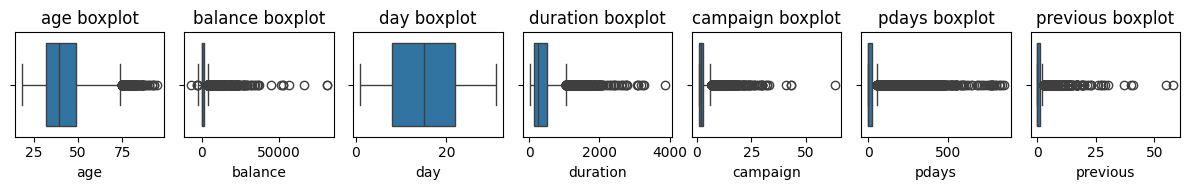

In [42]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(12, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, 7, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.tight_layout()
plt.show()

In [43]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)


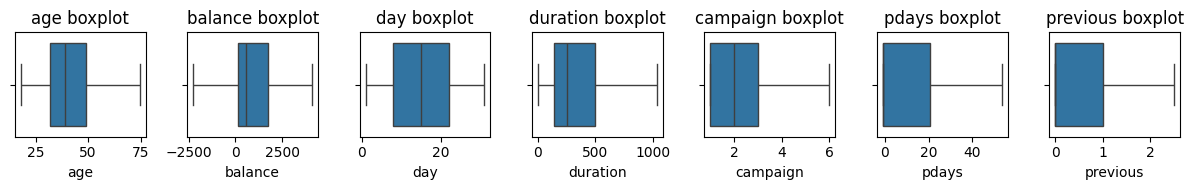

In [44]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(12, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, 7, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.tight_layout()
plt.show()

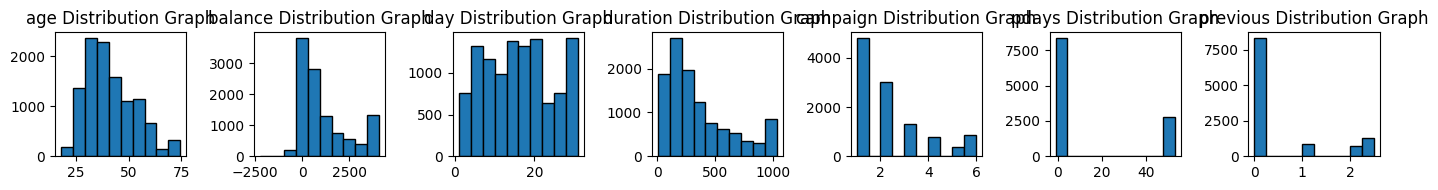

In [45]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(14, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, 7, i+1)
    plt.hist(df[col], edgecolor="black")
    plt.title(f"{col} Distribution Graph")
plt.tight_layout()
plt.show()

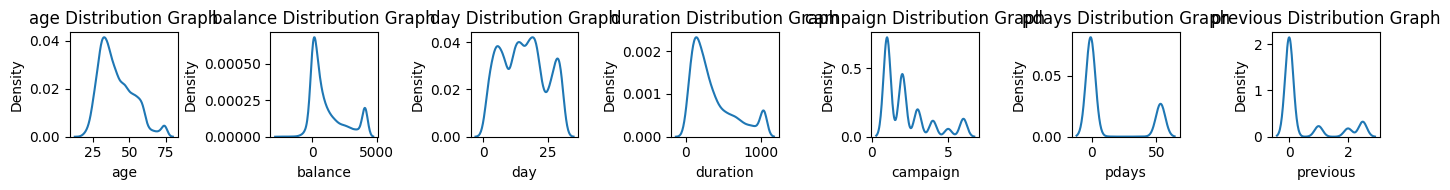

In [46]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(14, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, 7, i+1)
    sns.kdeplot(df[col])
    plt.title(f"{col} Distribution Graph")
plt.tight_layout()
plt.show()

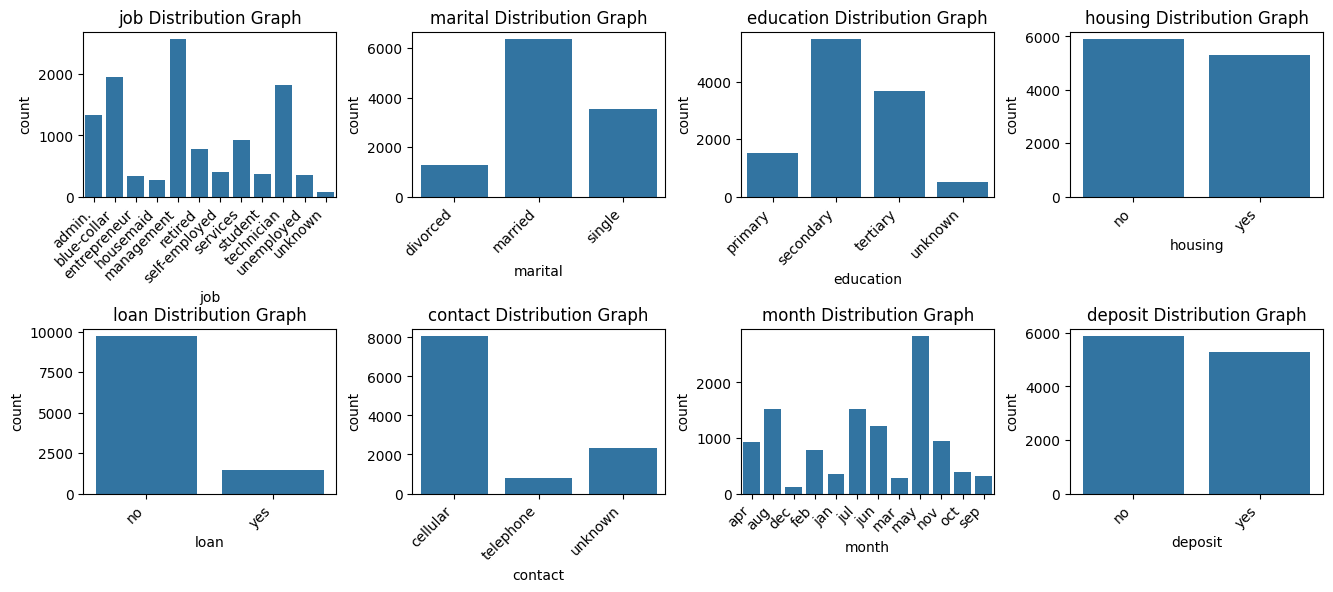

In [47]:
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(16, 6))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution Graph")
    plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()


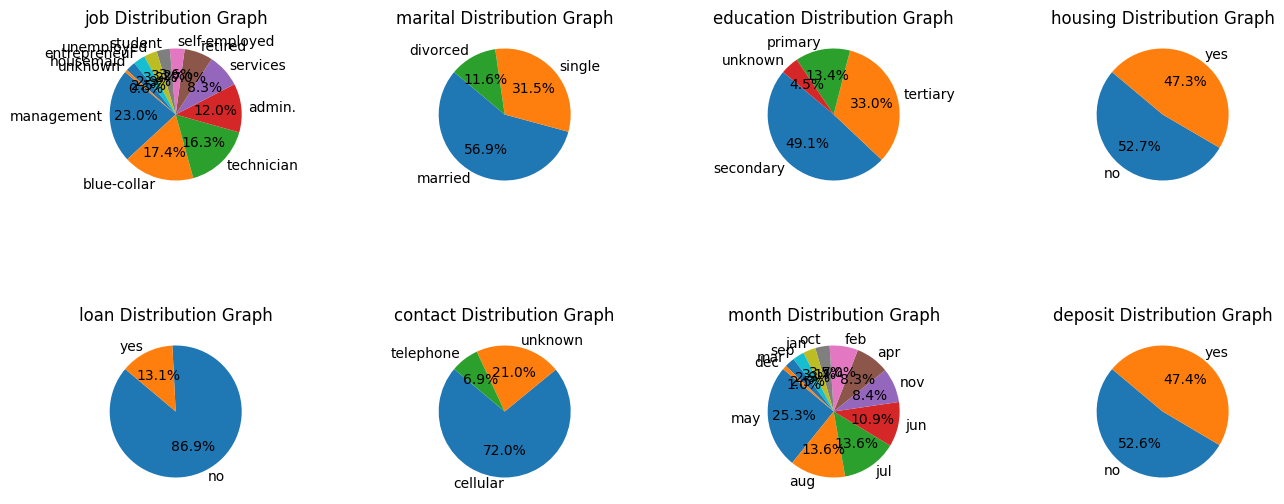

In [48]:
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(16, 6))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 4, i+1)
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels=categories, startangle=140, autopct='%1.1f%%')
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=.8, wspace=.3)
plt.show()


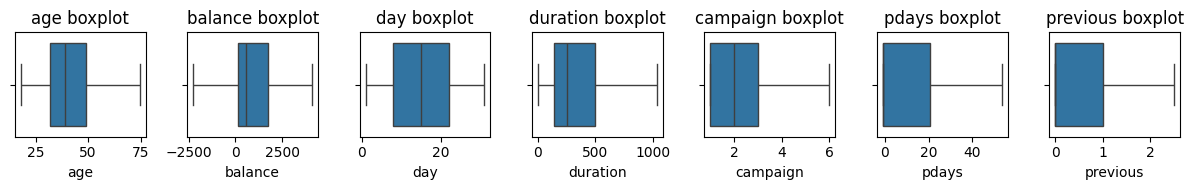

In [49]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(12, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, 7, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.tight_layout()
plt.show()

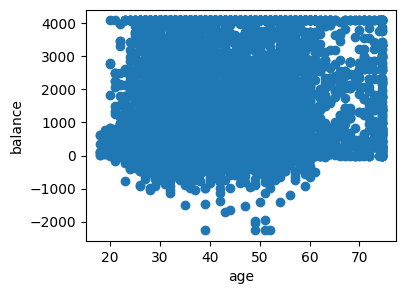

In [50]:
plt.figure(figsize=(4, 3))
plt.scatter(df["age"], df["balance"])
plt.xlabel("age")
plt.ylabel("balance")
plt.show()

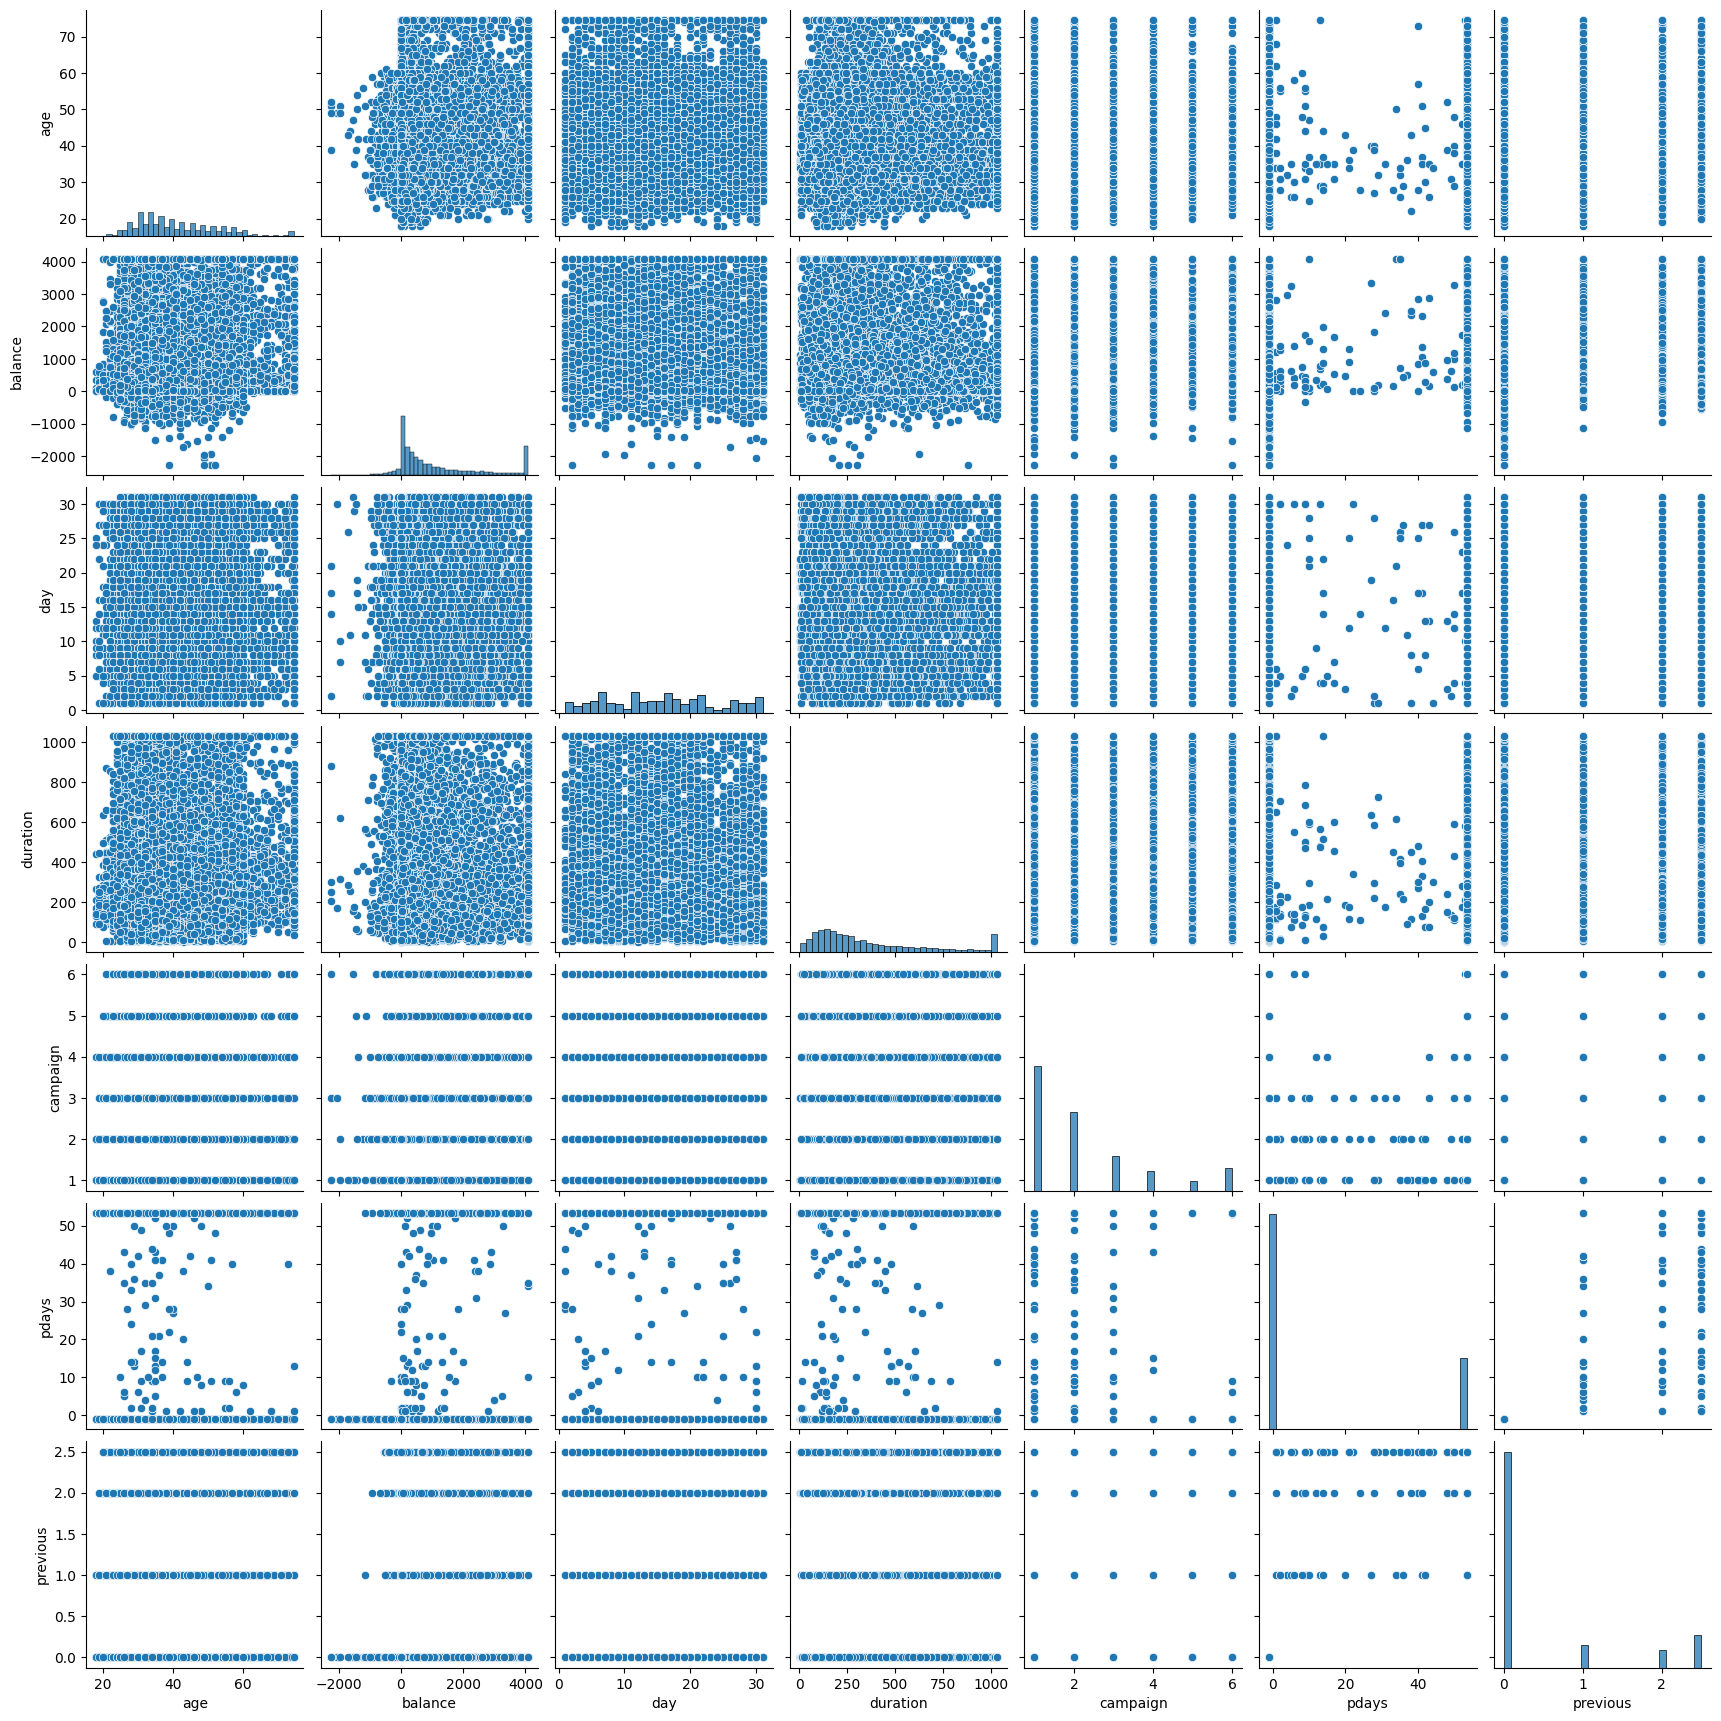

In [51]:
sns.pairplot(df.select_dtypes("number"))
plt.show()

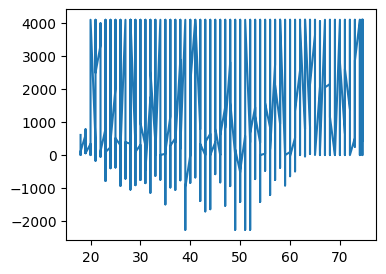

In [52]:
sorted_df = df.sort_values(by="age")
plt.figure(figsize=(4, 3))
plt.plot(sorted_df["age"], sorted_df["balance"])
plt.show()

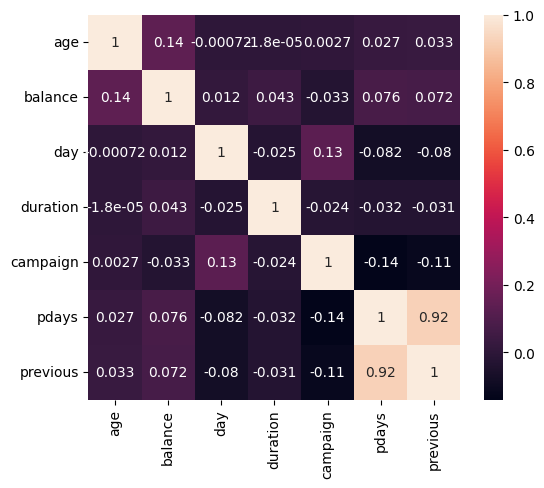

In [53]:
corr = df.select_dtypes("number").corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True)
plt.show()

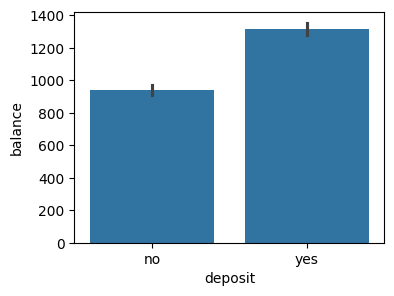

In [54]:
plt.figure(figsize=(4, 3))
sns.barplot(x="deposit", y="balance", data=df)
plt.show()


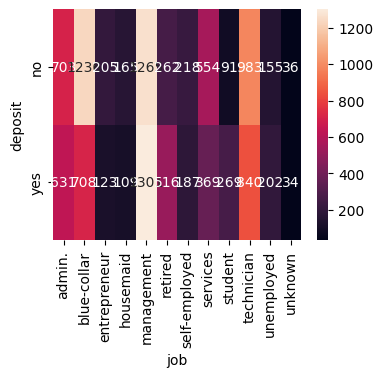

In [55]:
plt.figure(figsize=(4, 3))
agg = df.pivot_table(index="deposit", columns="job", values="age", aggfunc=len)
sns.heatmap(agg, annot=True, fmt='g')
plt.show()

In [56]:
print(f"Duplicates before removal: {df.duplicated().sum()}")

Duplicates before removal: 0


In [57]:
df.drop_duplicates(inplace=True)
print(f"Duplicates after removal: {df.duplicated().sum()}")

Duplicates after removal: 0


In [58]:
X = df.drop("deposit", axis=1)
y = df[["deposit"]]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (11162, 14)
y shape: (11162, 1)


In [59]:
from sklearn.preprocessing import MinMaxScaler
num_cols = X.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

In [60]:
str_cols = ["job", "marital", "education", "housing", "loan", "contact", "month"]
pd.DataFrame(X[str_cols].nunique()).T


,job,marital,education,housing,loan,contact,month
0,12,3,4,2,2,3,12


In [61]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols=str_cols, drop_invariant=True)
X = encoder.fit_transform(X)